# **Import libraries**

Pandas is just a library of python used for data manipulation and analysis after importing the data. Usually we add the second part (‘as pd’) so we can access Pandas with ‘pd.command’ instead of needing to write ‘pandas.command’ every time we need to use it.

NumPy is one of the most powerful Python libraries and an open-source numerical library. It is used in the industry for array computing. Usually we add the second part (‘as np’) so we can access NumPy with ‘np.command’ instead of needing to write ‘NumPy.command’ every time we need to use it.

Matplotlib is a multi-platform data visualization library built on NumPy arrays. It allows you to generate high-quality line plots, scatter plots, histograms, bar charts, and much more. Usually we add the second part (‘as plt’) so we can access matplotlib.pyplot with ‘plt.command’ instead of needing to write ‘ matplotlib.pyplot.command’ every time we need to use it.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [ ]:
#@title Default title text
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# before runing the code we uploding the data file to google drive
data=pd.read_csv("/content/drive/MyDrive/BankNoteAuthentication.csv.csv")

In [ ]:
# training data (1372 instances) with many features.
dataset=np.asarray(data)
print(dataset.shape)

(1372, 5)


In [ ]:
v1=dataset[:,0]
v2=dataset[:,1]
classes=dataset[:,4]

The data or rather the dataset which was given to create the project was names “Twitter authentication dataset”. In the dataset there are two feature- V1 and V2.

To work on this research the mean and standard deviation of both V1 and V2 was calculated. Where the mean of V1 and V2 is 0 .434 and 1.922 respectively. And the standard deviation of V1 and V2 are 2.842 and 5.867 respectively

the dataset in this report is consisted of data extracted from imagines with Wavelet Transform. The imagines were taken from genuine and forged banknote specimens (n=1372). There are two attributes in this dataset (V1: variance of Wavelet Transformed image and V2 skewness of Wavelet Transformed image).

In [ ]:

mean_v1=np.mean(v1)
std_v1=np.std(v1)
mean_v2=np.mean(v2)
std_v2=np.std(v2)

print("the mean of v1 feature is:%d", mean_v1)
print("the mean of v2 feature is:%d", mean_v2)
print("the standard deviation of v1 feature is: %d", std_v1)
print("the standard deviation of v2 feature is: %d", std_v2)


the mean of v1 feature is:%d 0.4337352570699707
the mean of v2 feature is:%d 1.9223531206393585
the standard deviation of v1 feature is: %d 2.841726405239481
the standard deviation of v2 feature is: %d 5.866907488387089


**Result**

Table 1 summarizes the two variables. It shows that V2 has higher mean and standard deviation and wider range than V1.

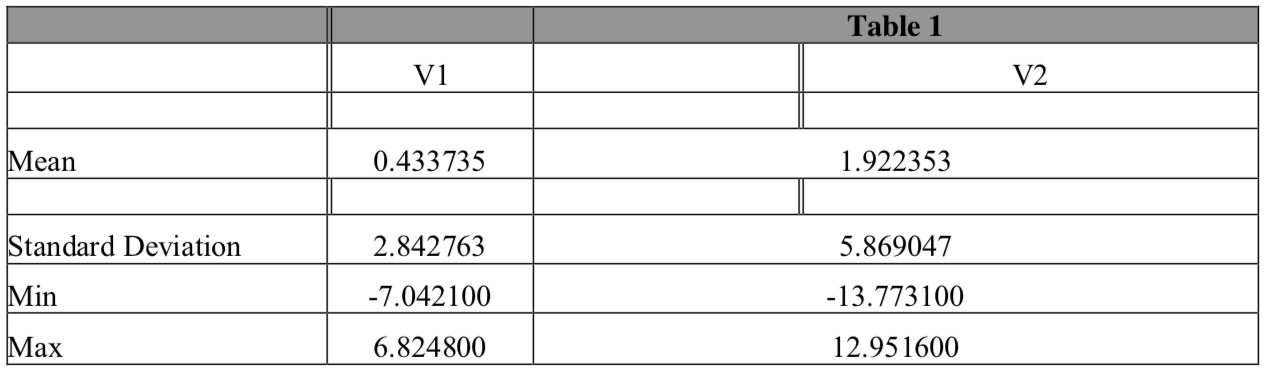

**Visualizes the distribution of the data.**

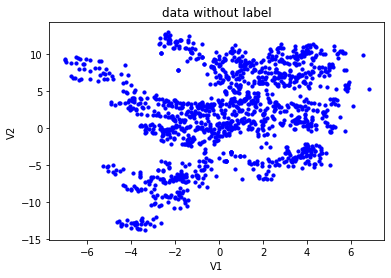

In [ ]:
# plot the unlabeled data
plt.scatter(v1, v2, s =10, c='b')
plt.title('data without label')
plt.xlabel('V1')
plt.ylabel('V2')
plt.show()

**The Distribution of data**

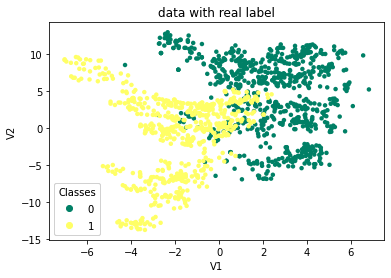

In [ ]:
# plot the labeled data
fig, ax = plt.subplots()
scatter = ax.scatter(v1, v2,c = classes, s =20,cmap = 'summer', edgecolors='none')
# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)
plt.title('data with real label')
plt.xlabel('V1')
plt.ylabel('V2')
plt.show()

In [ ]:
v1=v1.reshape(1372,1)
v2=v2.reshape(1372,1)
classes=classes.reshape(1372,1)
print(v1.shape)
print(v2.shape)
print(classes.shape)

(1372, 1)
(1372, 1)
(1372, 1)


In [ ]:
# normalization
normalized_v1 =(v1+7.0421)/13.8669
normalized_v2 = (v2+13.773100)/26.7247
training_data=np.concatenate((normalized_v1, normalized_v2),axis=1)
print(training_data.shape)
print(np.min(normalized_v1))
print(np.max(normalized_v2))


(1372, 2)
0.0
1.0


Then k-mean cluster analysis was conducted. It is aimed to make two cluster (i.e. forged and genuine).

In [ ]:
Kmean = KMeans(n_clusters=2) #k means library
Kmean.fit(training_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
#print(training_data[0])
#test = Kmean.predict(training_data[0].reshape(1,2))
#print(test)

Two blue dots are the centers of the two cluster.

In [ ]:
centers=Kmean.cluster_centers_
print(centers)

[[0.67364922 0.69798136]
 [0.36955897 0.44781178]]


In [ ]:
y_kmeans = Kmean.predict(training_data)
y_kmeans=y_kmeans.reshape(1372,1)
print(y_kmeans.shape)

(1372, 1)


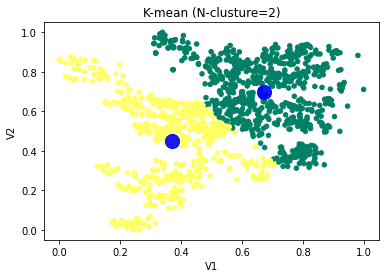

In [ ]:
plt.scatter(normalized_v1, normalized_v2, c = y_kmeans, s = 20, cmap = 'summer' )
#centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'blue', s = 200, alpha = 0.9);
plt.title('K-mean (N-clusture=2)')
plt.xlabel('V1')
plt.ylabel('V2')
plt.show()

It looks like K-mean cluster can successfully distinguish features extracted from twitter dataset. However, it is also noted that there are some overlaps, and some are possibly misidentified.

In [ ]:
# Evaluation
TN, FP, FN, TP = confusion_matrix(classes, y_kmeans).ravel()
accuracy = ((TP + TN)/(TP + TN + FP + FN))*100
print(accuracy)

87.24489795918367


Table 2 turns the visual representation into numbers. Compared the prediction from the K-mean cluster analysis and the data label from the dataset. It shows that error rate is 12.76% with half of it false positive (i.e. misidentified forged tweets as genuine tweets) and half of it false negative (i.e. misidentified genuine tweets as forged tweets). The success rate in distinguishing between forged sentiment of tweets and genuine sentiment of tweets from the extracted features accuracy is 87.24%.


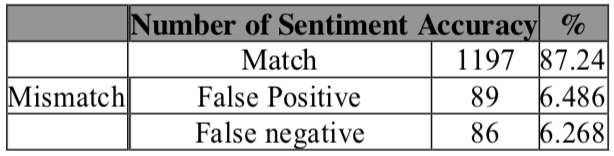

**Conclusion**

The Classification and clustering are two majors widely used methods applied to perform sentiment analysis of Twitter data and big data. The researchers have used the K-Means clustering algorithm to find sentiment performance classification that improves accuracy on tweets.

The success rate in distinguishing between the forged sentiment of tweets and genuine sentiment of tweets from the extracted features accuracy is 87.24%. The sentiment classification performance of Twitter data gives better results in terms of classification accuracy of 87.24%. The algorithm is working stable.

